# Построение ML и DL модели

belbor1@gmail.com

Целевая переменная - "dep_var"

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('20170504_test_download.csv', delimiter='\t')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (69,78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.iloc[:,69].dtypes

dtype('O')

In [5]:
df.iloc[:,69].value_counts()

YamanaLab Robot    70
Name: var63, dtype: int64

In [6]:
df.iloc[:,78].dtypes

dtype('O')

In [7]:
df.iloc[:,78].value_counts()

f    6
t    5
Name: var72, dtype: int64

Разберемся с миксованными типами данных позже

## Рассмотрение датасета

In [8]:
df.head()

,account_id,client_id,time_msw,test_cr_decision,test_cr_performance,dep_var,month_verif,var1,var2,var3,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
0,Company2,211804,2016-09-01 00:11:59,RJC,NaN,NaN,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
1,Company2,211807,2016-09-01 00:19:46,APR,OK,0.0,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
2,Company2,211808,2016-09-01 00:25:44,RJC,NaN,NaN,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
3,Company2,193611,2016-09-01 00:40:53,APR,OK,0.0,201609,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
4,Company2,7233,2016-09-01 00:49:33,RJC,NaN,NaN,201609,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84130 entries, 0 to 84129
Columns: 161 entries, account_id to var154
dtypes: float64(20), int64(58), object(83)
memory usage: 103.3+ MB


In [10]:
df.describe()

,client_id,dep_var,month_verif,var1,var2,var3,var4,var5,var6,var7,...,var85,var87,var102,var103,var116,var117,var151,var152,var153,var154
count,8.413000e+04,23490.000000,84130.000000,57455.0,84130.0,57455.0,57455.000000,84130.000000,84130.000000,84130.000000,...,38092.000000,35968.000000,0.0,0.0,84130.000000,84130.000000,84130.000000,84130.000000,84130.000000,84130.000000
mean,4.995669e+05,0.353895,201610.460121,1.0,1.0,1.0,0.820729,0.993332,0.117259,0.646927,...,23.806101,6.361597,NaN,NaN,0.682967,0.288613,144.870855,177.699429,5.239368,4.227041
std,3.502166e+05,0.478187,0.870570,0.0,0.0,0.0,0.383582,0.081387,0.321731,0.477928,...,2.235674,4.248544,NaN,NaN,0.465323,0.453120,311.911319,438.979112,11.008458,2.239471
min,2.900000e+02,0.000000,201609.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,...,8.000000,0.300000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
25%,2.216202e+05,0.000000,201610.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,0.000000,...,24.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.518025e+05,0.000000,201611.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,...,24.000000,5.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,6.487552e+05,1.000000,201611.000000,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,...,24.000000,8.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000
max,1.185812e+06,1.000000,201612.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,32.000000,41.000000,NaN,NaN,1.000000,1.000000,2560.000000,2560.000000,32.000000,26.000000


In [11]:
print('Длина датафрейма: {} строки'.format(len(df)))

Длина датафрейма: 84130 строки


In [12]:
# целевая переменная
df.dep_var.describe()

count    23490.000000
mean         0.353895
std          0.478187
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: dep_var, dtype: float64

In [13]:
print('В целевой переменной пропущено {} % строк'.
      format(round((df.dep_var.isnull().sum() / len(df) * 100), 1)))

В целевой переменной пропущено 72.1 % строк


In [14]:
df.dep_var.value_counts()

0.0    15177
1.0     8313
Name: dep_var, dtype: int64

Целевая переменная по сути является категориальной. Будем решать задачу классификации.

При этом категория 0 почти в два раза количественно превышает категорию 1. Столбец имеет значительное число пропущенных значений.

In [15]:
print('вероятность возникновения значения 0 составляет: {}'.format(df.dep_var.value_counts()[0] / (df.dep_var.value_counts()[0] + df.dep_var.value_counts()[1])))

print('доля пропущенных значений по целевой переменной составляет: {}'.format(df.dep_var.isnull().sum() / len(df)))

вероятность возникновения значения 0 составляет: 0.6461047254150702
доля пропущенных значений по целевой переменной составляет: 0.7207892547248306


In [16]:
# исключим из датасета те строки, в которых пропущена целевая переменная
df = df[df.dep_var.notna()]
len(df)

23490

In [17]:
df.head()

,account_id,client_id,time_msw,test_cr_decision,test_cr_performance,dep_var,month_verif,var1,var2,var3,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,Company2,211807,2016-09-01 00:19:46,APR,OK,0.0,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
3,Company2,193611,2016-09-01 00:40:53,APR,OK,0.0,201609,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
10,Company2,211812,2016-09-01 01:31:51,APR,OK,0.0,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
11,Company2,211814,2016-09-01 01:42:15,APR,OK,0.0,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
13,Company2,56232,2016-09-01 02:30:43,APR,OK,0.0,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


In [18]:
df.dtypes.value_counts()

object     83
int64      58
float64    20
dtype: int64

## Подготовка данных

### Исключим столбцы с большим числом пропусков

(array([89.,  1.,  7.,  1.,  0., 34., 10.,  0.,  1., 18.]),
 array([    0.,  2349.,  4698.,  7047.,  9396., 11745., 14094., 16443.,
        18792., 21141., 23490.]),
 <BarContainer object of 10 artists>)

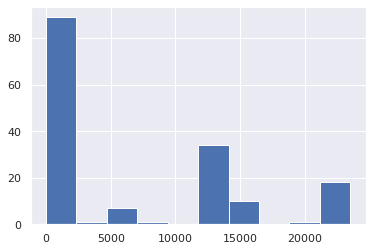

In [19]:
# частота наблюдений различного количества пропусков
plt.hist((df.isnull().sum()))

In [20]:
# уберем столбцы со значительным числом пропусков (> 20%)
col_with_nans = []
part_of_pass = 0.2
for n in df.columns:
    if df[n].isnull().sum() > (len(df) * part_of_pass):
        col_with_nans.append(n)
print('Количество столбцов с пропусками более {} длины df: {}'.format(part_of_pass, 
                                                                      len(col_with_nans)))
# исключены столбцы с пропусками
df_drop_wight = df.drop(columns=col_with_nans, axis=1)

Количество столбцов с пропусками более 0.2 длины df: 71


In [21]:
df_drop_wight.head()

,account_id,client_id,time_msw,test_cr_decision,test_cr_performance,dep_var,month_verif,var2,var5,var6,...,var106,var109,var110,var111,var116,var117,var151,var152,var153,var154
1,Company2,211807,2016-09-01 00:19:46,APR,OK,0.0,201609,1,1,0,...,NT 6.3,Chrome,52.0.2743.116,WebKit,1,1,0,0,0,7
3,Company2,193611,2016-09-01 00:40:53,APR,OK,0.0,201609,1,1,0,...,NT 10.0,Edge,13.10586,EdgeHTML,0,0,0,0,0,3
10,Company2,211812,2016-09-01 01:31:51,APR,OK,0.0,201609,1,1,0,...,NT 6.3,Opera,39.0.2256.48,Blink,1,0,0,0,0,3
11,Company2,211814,2016-09-01 01:42:15,APR,OK,0.0,201609,1,1,1,...,NT 6.3,Chrome,52.0.2743.116,WebKit,1,0,0,0,0,3
13,Company2,56232,2016-09-01 02:30:43,APR,OK,0.0,201609,1,1,0,...,NT 6.1,Firefox,48.0,Gecko,1,1,0,0,0,3


In [22]:
df_drop_wight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 1 to 84126
Data columns (total 90 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   account_id           23490 non-null  object 
 1   client_id            23490 non-null  int64  
 2   time_msw             23490 non-null  object 
 3   test_cr_decision     23490 non-null  object 
 4   test_cr_performance  23451 non-null  object 
 5   dep_var              23490 non-null  float64
 6   month_verif          23490 non-null  int64  
 7   var2                 23490 non-null  int64  
 8   var5                 23490 non-null  int64  
 9   var6                 23490 non-null  int64  
 10  var7                 23490 non-null  int64  
 11  var8                 23490 non-null  int64  
 12  var9                 23490 non-null  int64  
 13  var10                23490 non-null  int64  
 14  var11                23490 non-null  int64  
 15  var12                23490 non-null 

### Преобразуем категориальные переменные

In [23]:
# столбцы с перемеными типа object
objects = df_drop_wight.dtypes[df.dtypes == 'object'].index
len(objects)

30

In [24]:
# посмотрим на пропуски в категориальных переменных
for i in objects:
    print(i, df_drop_wight[i].isnull().sum())

account_id 0
time_msw 0
test_cr_decision 0
test_cr_performance 39
var46 44
var62 44
var64 2
var65 1
var66 1
var67 1
var68 1
var69 1
var70 1
var73 158
var74 455
var75 762
var79 2
var80 70
var88 167
var89 149
var90 27
var91 21
var92 30
var93 38
var94 30
var105 16
var106 103
var109 241
var110 4343
var111 254


In [25]:
# посмотрим на значения этих переменных
for i in objects:
    print(df_drop_wight.loc[:,i].value_counts())

Company1    15578
Company2     6160
Company3     1752
Name: account_id, dtype: int64
2016-11-08 17:46:51    2
2016-11-12 10:53:07    2
2016-11-12 18:55:02    2
2016-10-18 07:10:28    2
2016-12-07 07:12:20    2
                      ..
2016-10-08 13:04:16    1
2016-09-26 10:45:12    1
2016-11-29 18:35:09    1
2016-10-13 16:42:03    1
2016-10-08 00:33:53    1
Name: time_msw, Length: 23411, dtype: int64
APR    23490
Name: test_cr_decision, dtype: int64
OK        14532
NPL90+     8313
NPL90-      606
Name: test_cr_performance, dtype: int64
ISP        9774
MOB        6122
ISP/MOB    3494
COM        3070
DCH         812
ORG          88
EDU          80
GOV           5
LIB           1
Name: var46, dtype: int64
2017-04-30 00:00:00    4743
2015-11-30 00:00:00    4264
2017-01-31 00:00:00    2526
2016-05-31 00:00:00    1997
2015-12-31 00:00:00    1776
2017-02-28 00:00:00    1719
2017-03-31 00:00:00    1717
2016-11-30 00:00:00    1166
2016-12-31 00:00:00     876
2016-06-30 00:00:00     753
2016-08-

### Даты

Два столбца содержат дату (time_msw, var62). Поработаем с ними отдельно 

In [26]:
# Обработаем даты: отформатируем и разобъем
df_drop_wight.time_msw = pd.to_datetime(df_drop_wight.time_msw)
df_drop_wight.var62 = pd.to_datetime(df_drop_wight.var62)

df_drop_wight['year'] = df_drop_wight.time_msw.apply(lambda x: x.year)
df_drop_wight['month'] = df_drop_wight.time_msw.apply(lambda x: x.month)
df_drop_wight['day'] = df_drop_wight.time_msw.apply(lambda x: x.day)
df_drop_wight['hour'] = df_drop_wight.time_msw.apply(lambda x: x.hour 
                                            + x.minute/60).round(2)
df_drop_wight['weekday'] = df_drop_wight.time_msw.apply(lambda x: x.weekday())

df_drop_wight['year_62'] = df_drop_wight.var62.apply(lambda x: x.year)
df_drop_wight['month_62'] = df_drop_wight.var62.apply(lambda x: x.month)
df_drop_wight['day_62'] = df_drop_wight.var62.apply(lambda x: x.day)
df_drop_wight['weekday_62'] = df_drop_wight.var62.apply(lambda x: x.weekday())

df_drop_wight = df_drop_wight.drop(columns=['time_msw', 'var62'], axis=1)

In [27]:
df_drop_wight.head()

,account_id,client_id,test_cr_decision,test_cr_performance,dep_var,month_verif,var2,var5,var6,var7,...,var154,year,month,day,hour,weekday,year_62,month_62,day_62,weekday_62
1,Company2,211807,APR,OK,0.0,201609,1,1,0,1,...,7,2016,9,1,0.32,3,2017.0,3.0,31.0,4.0
3,Company2,193611,APR,OK,0.0,201609,1,1,0,1,...,3,2016,9,1,0.67,3,2016.0,11.0,30.0,2.0
10,Company2,211812,APR,OK,0.0,201609,1,1,0,1,...,3,2016,9,1,1.52,3,2017.0,1.0,31.0,1.0
11,Company2,211814,APR,OK,0.0,201609,1,1,1,1,...,3,2016,9,1,1.70,3,2017.0,4.0,30.0,6.0
13,Company2,56232,APR,OK,0.0,201609,1,1,0,1,...,3,2016,9,1,2.50,3,2015.0,12.0,31.0,3.0


In [28]:
# удалим из списка столбцов datetime столбцы
object_cols = list(objects)
time_cols = ['time_msw', 'var62']

for time in time_cols:
    object_cols.remove(time)

In [29]:
object_cols

['account_id',
 'test_cr_decision',
 'test_cr_performance',
 'var46',
 'var64',
 'var65',
 'var66',
 'var67',
 'var68',
 'var69',
 'var70',
 'var73',
 'var74',
 'var75',
 'var79',
 'var80',
 'var88',
 'var89',
 'var90',
 'var91',
 'var92',
 'var93',
 'var94',
 'var105',
 'var106',
 'var109',
 'var110',
 'var111']

### Заполним пропуски и закодируем категориальные переменные

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
# заполним пропуски наиболее частым вхождением и
# закодируем категориальные переменные 
for col in object_cols:
    df_drop_wight[col] = df_drop_wight[col].fillna(value=df_drop_wight[col].mode()[0])
    df_drop_wight[col] = le.fit_transform(df_drop_wight[col].astype('str'))

In [32]:
df_drop_wight.dep_var.value_counts()

0.0    15177
1.0     8313
Name: dep_var, dtype: int64

In [33]:
# удалим столбцы, в которых переменная не меняется
for col in df_drop_wight.columns:
    if len(df_drop_wight[col].value_counts()) == 1:
        df_drop_wight = df_drop_wight.drop(columns=col, axis=1)

In [34]:
df_drop_wight.head()

,account_id,client_id,test_cr_performance,dep_var,month_verif,var5,var6,var7,var8,var9,...,var153,var154,month,day,hour,weekday,year_62,month_62,day_62,weekday_62
1,1,211807,2,0.0,201609,1,0,1,0,0,...,0,7,9,1,0.32,3,2017.0,3.0,31.0,4.0
3,1,193611,2,0.0,201609,1,0,1,0,0,...,0,3,9,1,0.67,3,2016.0,11.0,30.0,2.0
10,1,211812,2,0.0,201609,1,0,1,0,0,...,0,3,9,1,1.52,3,2017.0,1.0,31.0,1.0
11,1,211814,2,0.0,201609,1,1,1,0,0,...,0,3,9,1,1.70,3,2017.0,4.0,30.0,6.0
13,1,56232,2,0.0,201609,1,0,1,0,0,...,0,3,9,1,2.50,3,2015.0,12.0,31.0,3.0


In [35]:
df_drop_wight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 1 to 84126
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   account_id           23490 non-null  int64  
 1   client_id            23490 non-null  int64  
 2   test_cr_performance  23490 non-null  int64  
 3   dep_var              23490 non-null  float64
 4   month_verif          23490 non-null  int64  
 5   var5                 23490 non-null  int64  
 6   var6                 23490 non-null  int64  
 7   var7                 23490 non-null  int64  
 8   var8                 23490 non-null  int64  
 9   var9                 23490 non-null  int64  
 10  var10                23490 non-null  int64  
 11  var11                23490 non-null  int64  
 12  var12                23490 non-null  int64  
 13  var13                23490 non-null  int64  
 14  var14                23490 non-null  int64  
 15  var15                23490 non-null 

In [36]:
# заполним пропуски для других столбцов средним значением 
for n in df_drop_wight.columns:
    if df_drop_wight[n].isnull().sum() > 0:
        df_drop_wight[n] = df_drop_wight[n].fillna(value = df_drop_wight[n].mean())

In [37]:
df_drop_wight

,account_id,client_id,test_cr_performance,dep_var,month_verif,var5,var6,var7,var8,var9,...,var153,var154,month,day,hour,weekday,year_62,month_62,day_62,weekday_62
1,1,211807,2,0.0,201609,1,0,1,0,0,...,0,7,9,1,0.32,3,2017.0,3.0,31.0,4.0
3,1,193611,2,0.0,201609,1,0,1,0,0,...,0,3,9,1,0.67,3,2016.0,11.0,30.0,2.0
10,1,211812,2,0.0,201609,1,0,1,0,0,...,0,3,9,1,1.52,3,2017.0,1.0,31.0,1.0
11,1,211814,2,0.0,201609,1,1,1,0,0,...,0,3,9,1,1.70,3,2017.0,4.0,30.0,6.0
13,1,56232,2,0.0,201609,1,0,1,0,0,...,0,3,9,1,2.50,3,2015.0,12.0,31.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84061,2,664059,2,0.0,201612,1,0,1,0,0,...,0,5,12,15,20.20,3,2015.0,11.0,30.0,0.0
84066,2,652798,0,1.0,201612,1,0,1,0,0,...,0,3,12,15,21.20,3,2016.0,8.0,31.0,2.0
84106,2,560013,2,0.0,201612,1,0,1,0,0,...,0,3,12,15,22.20,3,2016.0,7.0,31.0,6.0
84121,2,664184,2,0.0,201612,1,0,1,0,0,...,0,3,12,15,23.20,3,2017.0,3.0,31.0,4.0


In [38]:
df_drop_wight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 1 to 84126
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   account_id           23490 non-null  int64  
 1   client_id            23490 non-null  int64  
 2   test_cr_performance  23490 non-null  int64  
 3   dep_var              23490 non-null  float64
 4   month_verif          23490 non-null  int64  
 5   var5                 23490 non-null  int64  
 6   var6                 23490 non-null  int64  
 7   var7                 23490 non-null  int64  
 8   var8                 23490 non-null  int64  
 9   var9                 23490 non-null  int64  
 10  var10                23490 non-null  int64  
 11  var11                23490 non-null  int64  
 12  var12                23490 non-null  int64  
 13  var13                23490 non-null  int64  
 14  var14                23490 non-null  int64  
 15  var15                23490 non-null 

### Разделение на тренировочную и тестовую выборку

In [39]:
X = df_drop_wight.drop(columns='dep_var', axis=1).copy()
Y = df_drop_wight.dep_var.copy()

In [40]:
corr_table = X.corr()
corr_table.describe()

,account_id,client_id,test_cr_performance,month_verif,var5,var6,var7,var8,var9,var10,...,var153,var154,month,day,hour,weekday,year_62,month_62,day_62,weekday_62
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.030941,-0.024792,0.010554,0.017393,-0.000439,0.013281,-0.012736,0.066609,0.036850,0.063646,...,-0.023122,0.012005,0.017393,0.001463,0.010642,0.014220,-0.002009,0.004688,0.006054,0.009915
std,0.279365,0.320081,0.129976,0.183721,0.131689,0.130163,0.166101,0.244927,0.127230,0.248726,...,0.317423,0.115376,0.183721,0.117766,0.112031,0.109926,0.167652,0.155830,0.121691,0.131736
min,-0.895410,-0.783384,-0.203612,-0.206973,-0.483167,-0.208388,-0.439562,-0.381592,-0.050705,-0.425579,...,-0.895410,-0.176272,-0.206973,-0.319891,-0.176272,-0.049347,-0.898369,-0.898369,-0.151712,-0.247549
25%,-0.033191,-0.065183,-0.036185,-0.036146,-0.003264,-0.038158,-0.040382,-0.012762,-0.002512,-0.013692,...,-0.128908,-0.013815,-0.036146,-0.019002,-0.010625,-0.003644,-0.009782,-0.009796,-0.014126,-0.011950
50%,0.008682,-0.000855,-0.004607,0.002931,0.000386,-0.003445,0.000175,0.001223,0.000756,0.001159,...,-0.004410,-0.001070,0.002931,-0.003224,0.004405,0.000842,-0.000724,0.000283,0.002556,-0.001825
75%,0.060366,0.037437,0.027278,0.028093,0.005369,0.033023,0.026689,0.070483,0.024166,0.074591,...,0.057981,0.012945,0.028093,0.004492,0.013251,0.010264,0.010760,0.007115,0.011740,0.010185
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

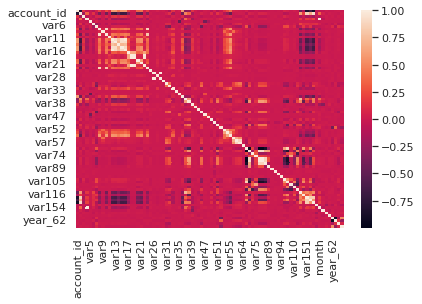

In [41]:
sns.heatmap(corr_table)

In [42]:
#plt.plot(df.corr().loc[:,'dep_var'])

Количество учтенных имен: 5638 
Количество учтенных переменных 84:


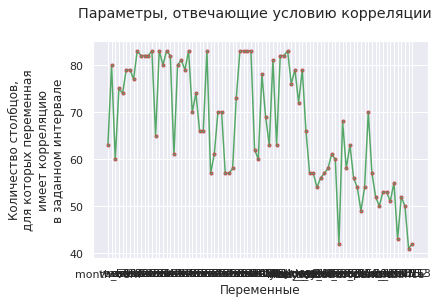

In [43]:
# посмотрим зависимые друг от друга переменные 
# отберем имена переменных с низкой корреляцией по отношению к другим

corr_level_low = -0.1
corr_level_high = 0.1
non_corr_feature_list = []
# для каждой переменной выделем те, которые имеют с корреляцию
# в заданном пределе
for column in corr_table.columns:
    indexes = (corr_table[corr_table.loc[:, column]
                          .between(corr_level_low, 
                                   corr_level_high)][column].index)
    non_corr_feature_list.append(indexes)

# запишем в один лист все имена таких переменных
non_corr_features = []
for index_list in non_corr_feature_list:
    for col_name in index_list:
        non_corr_features.append(col_name)
        
print('Количество учтенных имен: {}'.format(len(non_corr_features)), 
      '\nКоличество учтенных переменных {}:'.format(len(corr_table.columns)))

# посмотрим количество столбцов, для которого переменная 
# отвечает условию на корреляцию 
from collections import Counter

fig, ax = plt.subplots()
ax.plot(Counter(non_corr_features).keys(), 
         Counter(non_corr_features).values(), color='g', 
         mec='r', marker='.')
ax.set_xlabel('Переменные')
ax.set_ylabel('Количество столбцов,\nдля которых переменная\n\
имеет корреляцию\n\
в заданном интервале')
fig.suptitle('Параметры, отвечающие условию корреляции',
            y=1.0)

np.mean(list(Counter(non_corr_features).values()))
np.std(list(Counter(non_corr_features).values()))

freq = dict(Counter(non_corr_features))

In [44]:
## отбор столбцов по условию корреляции с другими

## функция для получения keys по values
# def get_key(dictionary, value):
#     for k, v in dictionary.items():
#         if v == value:
#             return k

## отбор столбцов 
# freq_level = (len(corr_table.columns) * 0.7)
# non_corr_cols = []
# for value in freq.values():
#     if value > freq_level:
#         non_corr_key = get_key(freq, value)
#         non_corr_cols.append(non_corr_key)
# print(non_corr_cols)

# X = X[non_corr_cols]

Можем задать порог на вхождение столбца в итоговый набор данных. Если корреляция значений данного столбца находится в заданном интервале по отношению к n столбцам из выборки (переменная freq_level), то вкючаем этот столбец в итоговый датасет. Собственно, можем задать n.

Однако по heatmap выше видно, что корреляция между переменными не большая и пока что не будем исключать столбцы по этому условию.

### Стандартизация

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X)

StandardScaler()

In [48]:
columns = X.columns

In [49]:
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columns)

In [50]:
X_scaled

,account_id,client_id,test_cr_performance,month_verif,var5,var6,var7,var8,var9,var10,...,var153,var154,month,day,hour,weekday,year_62,month_62,day_62,weekday_62
0,0.940907,-1.518420,0.771888,-2.145461,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,1.227411,-2.145461,-1.640177,-2.644073,0.05434,0.976185,-0.887693,0.880047,0.633184
1,0.940907,-1.563014,0.771888,-2.145461,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,-0.574469,-2.145461,-1.640177,-2.575060,0.05434,-0.242474,1.134444,-0.364364,-0.264511
2,0.940907,-1.518407,0.771888,-2.145461,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,-0.574469,-2.145461,-1.640177,-2.407456,0.05434,0.976185,-1.393227,0.880047,-0.713359
3,0.940907,-1.518402,0.771888,-2.145461,0.041815,2.678829,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,-0.574469,-2.145461,-1.640177,-2.371964,0.05434,0.976185,-0.634926,-0.364364,1.530879
4,0.940907,-1.899698,0.771888,-2.145461,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,-0.574469,-2.145461,-1.640177,-2.214219,0.05434,-1.461132,1.387211,0.880047,0.184336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,2.539482,-0.410054,0.771888,2.251789,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,0.326471,2.251789,-0.111211,1.275884,0.05434,-1.461132,1.134444,-0.364364,-1.162206
23486,2.539482,-0.437652,-1.332528,2.251789,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,-0.574469,2.251789,-0.111211,1.473065,0.05434,-0.242474,0.376143,0.880047,-0.264511
23487,2.539482,-0.665047,0.771888,2.251789,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,-0.574469,2.251789,-0.111211,1.670246,0.05434,-0.242474,0.123376,0.880047,1.530879
23488,2.539482,-0.409748,0.771888,2.251789,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.31562,...,-1.361491,-0.574469,2.251789,-0.111211,1.867427,0.05434,0.976185,-0.887693,0.880047,0.633184


### Тренировочная и тестовая выборки

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y, test_size=0.2)

In [53]:
X_train.shape

(18792, 84)

In [54]:
y_train.shape

(18792,)

In [55]:
X_val.shape

(4698, 84)

In [56]:
y_val.shape

(4698,)

In [57]:
X_train


,account_id,client_id,test_cr_performance,month_verif,var5,var6,var7,var8,var9,var10,...,var153,var154,month,day,hour,weekday,year_62,month_62,day_62,weekday_62
5021,-0.657669,0.573009,0.771888,-0.679711,0.041815,2.678829,-1.424160,-0.317005,-0.123519,-0.315620,...,0.411561,-0.123999,-0.679711,-0.548059,1.506586,-0.953115,0.976185,-1.140460,-2.853188,-0.713359
5896,-0.657669,0.589909,0.771888,-0.679711,0.041815,-0.373297,-1.424160,-0.317005,-0.123519,-0.315620,...,1.002578,-0.574469,-0.679711,-0.111211,0.175615,1.061795,0.976185,-0.634926,-0.364364,1.530879
2586,-0.657669,0.523660,-1.332528,-0.679711,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.315620,...,0.411561,2.578820,-0.679711,-1.421754,-1.498452,-1.456842,0.976185,-1.140460,-2.853188,-0.713359
20485,-0.657669,0.828678,-1.332528,0.786039,0.041815,-0.373297,-1.424160,-0.317005,-0.123519,-0.315620,...,1.002578,-0.574469,0.786039,0.980908,1.335039,0.558067,-0.242474,0.628910,-0.364364,0.633184
2055,-0.657669,0.514668,-1.332528,-0.679711,0.041815,-0.373297,-1.424160,-0.317005,-0.123519,-0.315620,...,1.002578,-0.123999,-0.679711,-1.640177,-0.966063,1.061795,-0.242474,0.881677,0.880047,-1.162206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,0.940907,-1.562186,-1.332528,-2.145461,0.041815,-0.373297,0.702168,3.154528,-0.123519,3.168365,...,-1.361491,-0.574469,-2.145461,1.308543,-1.232258,-0.449387,0.976185,-0.634926,-0.364364,1.530879
10930,2.539482,-0.572226,0.771888,-0.679711,0.041815,-0.373297,-1.424160,-0.317005,-0.123519,-0.315620,...,-1.361491,-0.574469,-0.679711,1.636179,0.086883,-1.456842,-0.242474,0.881677,0.880047,-1.162206
6820,-0.657669,0.607011,0.771888,-0.679711,0.041815,2.678829,-1.424160,-0.317005,-0.123519,-0.315620,...,0.411561,1.227411,-0.679711,0.325636,-0.524378,-0.449387,-1.461132,1.134444,-0.364364,-1.162206
22039,-0.657669,0.854832,-1.332528,0.786039,0.041815,-0.373297,0.702168,-0.317005,-0.123519,-0.315620,...,0.411561,0.326471,0.786039,1.417755,-0.301563,-0.953115,0.976185,-0.634926,-0.364364,1.530879


In [58]:
y_train

21165    0.0
23424    0.0
15070    1.0
69465    1.0
13914    1.0
        ... 
12339    1.0
38663    0.0
26092    0.0
73910    1.0
19669    0.0
Name: dep_var, Length: 18792, dtype: float64

## Построение моделей

### Линейная регрессия

По заданию необходимо пременить линейную регрессию. Однако для задачи классификации более подходит логистическая регрессия. Рассмотрим оба варианта.

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression = LinearRegression()

In [61]:
regression.fit(X_train, y_train)

LinearRegression()

In [62]:
y_linear_pred = regression.predict(X_val)

In [63]:
(y_val - y_linear_pred).describe()

count    4698.000000
mean       -0.001494
std         0.082653
min        -0.505750
25%         0.005981
50%         0.012087
75%         0.018073
max         0.079598
Name: dep_var, dtype: float64

(array([1.040e+02, 2.800e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.100e+01, 3.779e+03,
        7.400e+02, 4.000e+00]),
 array([-0.50575007, -0.47648264, -0.44721522, -0.41794779, -0.38868036,
        -0.35941293, -0.3301455 , -0.30087808, -0.27161065, -0.24234322,
        -0.21307579, -0.18380836, -0.15454094, -0.12527351, -0.09600608,
        -0.06673865, -0.03747122, -0.0082038 ,  0.02106363,  0.05033106,
         0.07959849]),
 <BarContainer object of 20 artists>)

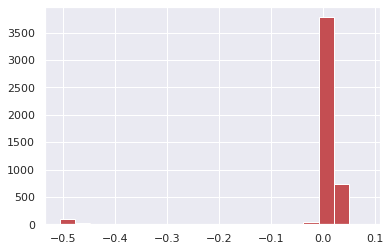

In [64]:
plt.hist(y_val-y_linear_pred, bins=20,color='r')

##### MSE

In [65]:
mse = np.mean((y_val-y_linear_pred)**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(y_val-y_linear_pred)))

mse 0.006832313861268524
sqrt(mse) 0.08265781185870168
avg_error 0.026438559225793162


In [66]:
print('Коэффициент детерминации модели составляет: {}'
      .format(regression.score(X_val, y_val)))

Коэффициент детерминации модели составляет: 0.9701950335876777


Качество модели высокое, величина MSE низкая.

### Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression()

In [69]:
clf.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_logist_pred = clf.predict(X_val)

##### MSE

In [71]:
mse_logistic = np.mean((y_val-y_logist_pred)**2)
print('mse', mse_logistic)
print('sqrt(mse)', mse_logistic**0.5)
print('avg_error', np.mean(abs(y_val-y_logist_pred)))

mse 0.0
sqrt(mse) 0.0
avg_error 0.0


(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 4698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <BarContainer object of 20 artists>)

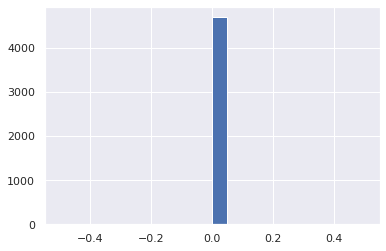

In [72]:
plt.hist(y_val-y_logist_pred, bins=20)

In [73]:
clf.score(X_val, y_val)

1.0

In [74]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
C = np.arange(1, 10, 1)
max_iter = np.arange(100, 500, 50)
#penalty = ['l2', 'none']
grid = {'C': C, 'max_iter': max_iter}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='roc_auc', cv=4)

In [77]:
%%time
gridsearch.fit(X_train, y_train)

CPU times: user 2min 23s, sys: 2min 31s, total: 4min 54s
Wall time: 36.9 s


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450])},
             scoring='roc_auc')

In [78]:
best_param = gridsearch.best_params_
best_param

{'C': 1, 'max_iter': 100}

#### Итоговая модель

In [79]:
clf_final = LogisticRegression(C = best_param.get('C'), max_iter = best_param.get('max_iter'))

По сути подбор гиперпараметров в данной ситуации не нужен. Дефолтные настройки справляются. Модель безошибочно справиласть с тестовой выборкой.

### MLP Classificator

Постороение сложной модели в данном случае не требуется. Однако опробуем методы DL. Будем использовать deep learning классификатор из библиотеки sklearn.

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
DL_clf = MLPClassifier()

In [82]:
DL_clf.fit(X_train, y_train)

MLPClassifier()

In [83]:
y_DL = DL_clf.predict(X_val)

#### MSE

In [84]:
mse_DL = np.mean((y_val-y_DL)**2)
print('mse', mse_DL)
print('sqrt(mse)', mse_DL**0.5)
print('avg_error', np.mean(abs(y_val-y_DL)))

mse 0.0006385696040868455
sqrt(mse) 0.025269934785963448
avg_error 0.0006385696040868455


In [85]:
DL_clf.score(X_val, y_val)

0.9993614303959132

In [86]:
DL_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [87]:
y_DL

array([0., 0., 0., ..., 0., 0., 1.])

При необходимости можно было бы заняться подбором гиперпараметров для классификатора.

### В чем причина такого результата?

In [88]:
(df_drop_wight.corr().dep_var[df_drop_wight.corr().dep_var < 1]
 .sort_values(ascending=True))

test_cr_performance   -0.986194
var13                 -0.156933
account_id            -0.146737
var15                 -0.143967
var12                 -0.137217
                         ...   
var37                  0.111726
var116                 0.126629
var151                 0.151506
var153                 0.187756
client_id              0.193781
Name: dep_var, Length: 84, dtype: float64

In [89]:
(df_drop_wight.corr().dep_var[df_drop_wight.corr().dep_var < 1]
 .sort_values(ascending=False))

client_id              0.193781
var153                 0.187756
var151                 0.151506
var116                 0.126629
var37                  0.111726
                         ...   
var12                 -0.137217
var15                 -0.143967
account_id            -0.146737
var13                 -0.156933
test_cr_performance   -0.986194
Name: dep_var, Length: 84, dtype: float64

Дело в корреляции между одной из перменных выборки и целевой переменной. Параметр 'test_cr_performance' имеет очень высокую корреляцию с целевой переменной (-0,99). Посмотрим ниже, какой результат будет, если 'test_cr_performance' исключить из тренировочной и тестовой выборки.

In [90]:
xx_tr = X_train.drop(columns='test_cr_performance', axis=1)
xx_test = X_val.drop(columns='test_cr_performance', axis=1)

In [91]:
clf_test = LogisticRegression(max_iter=300, C=1)

In [92]:
clf_test.fit(xx_tr, y_train)

LogisticRegression(C=1, max_iter=300)

In [93]:
y_logist_pred_2 = clf_test.predict(xx_test)

In [94]:
print('accuracy = {}'.format(clf_test.score(xx_test, y_val)))

accuracy = 0.6470838654746701


In [95]:
mse_logistic_test = np.mean((y_val-y_logist_pred_2)**2)
print('mse', mse_logistic_test)
print('sqrt(mse)', mse_logistic_test**0.5)
print('avg_error', np.mean(abs(y_val-y_logist_pred_2)))

mse 0.35291613452532994
sqrt(mse) 0.5940674494746618
avg_error 0.35291613452532994


Видно, насколько снижается accuracy, и увеличивается MSE для такой модели.

In [96]:
print('MSE увеличивается на {}\n'
     .format(round((mse_logistic_test - mse_logistic), 2)))

MSE увеличивается на 0.35



## Вывод

Получена модель на основе логистической регрессии, которая прогнозирует целевую переменную с высокой точностью.
